## Step-1:Data pre-processing

## Using SVMs(Support vector machines) algorithm

1. Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

2. Importing the dataset using the pandas library

In [10]:
data=pd.read_csv("covid_19_india.csv",parse_dates=['Date'],dayfirst=True)
data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [11]:
data=data[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
data

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [12]:
data.shape

(18110, 5)

In [13]:
data.columns=['date','state','cured','deaths','confirmed']
data.head(5)

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [14]:
data.tail(5)

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [15]:
today=data[data.date=='2021-08-11']
today

,date,state,cured,deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279
18079,2021-08-11,Chandigarh,61150,811,61992
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18081,2021-08-11,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654
18082,2021-08-11,Delhi,1411280,25068,1436852
18083,2021-08-11,Goa,167978,3164,172085


In [16]:
max_confirmed_cases=today.sort_values(by='confirmed',ascending=False)
max_confirmed_cases.head()

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [17]:
top_stated_confirmed=max_confirmed_cases[0:5]
top_stated_confirmed

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


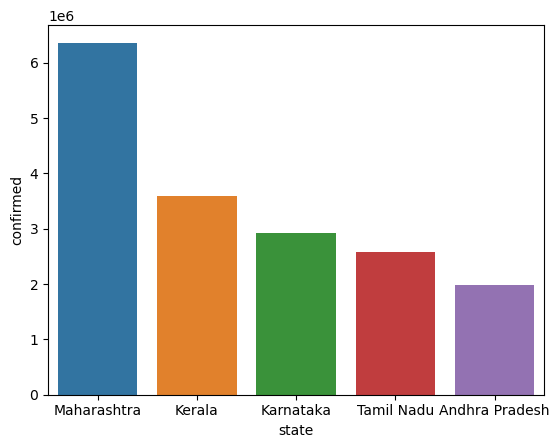

In [18]:
sns.barplot(x="state",y='confirmed',data=top_stated_confirmed)
plt.show()

In [19]:
max_death_cases=today.sort_values(by='deaths',ascending=False)
max_death_cases.head()

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [20]:
top_stated_death=max_death_cases[0:5]
top_stated_death

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


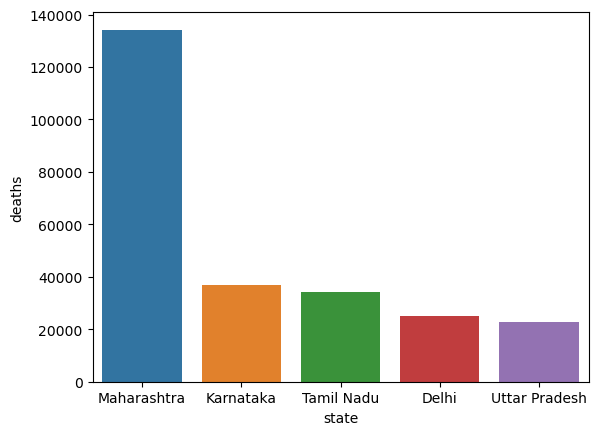

In [25]:
sns.barplot(x="state",y='deaths',data=top_stated_death)
plt.show()

In [26]:
max_cured_cases=today.sort_values(by='cured',ascending=False)
max_cured_cases.head()

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


In [27]:
top_stated_cured=max_cured_cases[0:5]
top_stated_cured

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


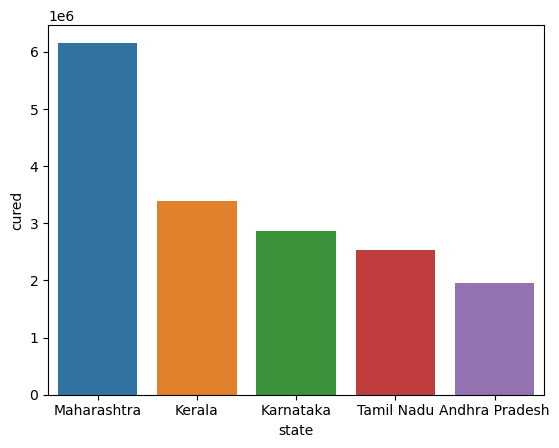

In [28]:
sns.barplot(x="state",y='cured',data=top_stated_cured)
plt.show()

In [4]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

# Here,BareNuc column contains the 'object' variable so we have to convert it in numerical variable

In [5]:
#Using to_numeric function of pandas library
data = data[pd.to_numeric(data['BareNuc'], errors='coerce').notnull()]
data['BareNuc'] = data['BareNuc'].astype('int')

#printing the results
data.dtypes

C:\Users\hp\AppData\Local\Temp\ipykernel_11744\1887118782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BareNuc'] = data['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

3. Checking the missing values in the dataset

In [6]:
data.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

Here no any missing values found.

4. Extracting the independent and dependent variables

In [7]:
#for independent variable
x=data.iloc[:,[1,2,3,4,5,6,7,8,9]]
x.head(5)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [8]:
#for dependent variable
y=data.iloc[:,10]
y.head(5)

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

5. Splitting the dataset into Training and Training dataset

In [9]:
#importing the train_test_split class from the scikit-learn.model_selection library
from sklearn.model_selection import train_test_split

#splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [10]:
x_train

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
571,7,6,10,5,3,10,9,10,2
68,8,3,8,3,4,9,8,9,8
586,8,10,10,10,6,10,10,10,1
311,1,1,1,1,2,1,1,1,1
369,1,1,3,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...
9,4,2,1,1,2,1,2,1,1
373,5,1,1,2,2,1,2,1,1
198,1,1,1,1,2,1,1,1,1
645,3,1,1,1,2,1,2,1,1


In [11]:
x_test

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
115,1,1,1,1,2,5,1,1,1
392,3,1,1,1,2,1,2,1,1
316,5,5,5,2,5,10,4,3,1
519,4,7,8,3,4,10,9,1,1
313,1,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...
458,5,1,2,1,2,1,1,1,1
165,4,1,1,1,2,2,3,2,1
331,5,1,1,1,2,1,3,1,2
80,2,2,2,1,1,1,7,1,1


In [12]:
y_train

571    4
68     4
586    4
311    2
369    2
      ..
9      2
373    2
198    2
645    2
574    4
Name: Class, Length: 512, dtype: int64

In [13]:
y_test

115    2
392    2
316    4
519    4
313    2
      ..
458    2
165    2
331    2
80     2
94     2
Name: Class, Length: 171, dtype: int64

## Step-2: Fitting the SVM classifier to the training data:

In [14]:
#importing the kneighbors classifier form the scikit-learn.neighbors library
from sklearn import svm

#create an instance
classifier=svm.SVC(kernel='rbf')

#fitting the values in the classifier
classifier.fit(x_train,y_train)

SVC()

## Step-3:Predicting the test set result:

In [15]:
y_pred=classifier.predict(x_test)

In [16]:
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int64)

## Step-4:Creating the confusion matrix

In [17]:
#importing the confusion matrix class from the scikit-learn.metrics library
from sklearn.metrics import confusion_matrix

#creating an instance
cm=confusion_matrix(y_test,y_pred)

In [18]:
cm

array([[102,   5],
       [  3,  61]], dtype=int64)

## Step-5:Printing the classification report

In [19]:
#importing the classification_report class from scikit-learn library.
from sklearn.metrics import classification_report

#printing the results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.97      0.95      0.96       107
           4       0.92      0.95      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## Step-6:Accuracy score

In [20]:
from sklearn.metrics import accuracy_score

#creating an instance
accuracy=accuracy_score(y_test,y_pred)

#printing the accuracy score
print("Accuracy score:",accuracy*100,"%")

Accuracy score: 95.32163742690058 %


## Hence the accuracy score of SVM model is 95.32%